# Benchmarcks and plots of various SVM RL envs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
## All the data stored in the hdf5 file
f = h5py.File('run_0.hdf5', 'r')

list(f)

['actor_models',
 'critic_models',
 'energies',
 'hyperparams',
 'info',
 'princip_dims',
 'rewards',
 'sigmas']

In [3]:
## Read file and print its info and hyperparams
for k in f['info'].attrs.keys():
    print(k, ' : ', f['info'].attrs[k])

for k in f['hyperparams'].attrs.keys():
    print(k, ' : ', f['hyperparams'].attrs[k])

alg  :  DDPG
env  :  svmEnv-v1
add_noise_every  :  1
batch_size  :  64
bootstrap_size  :  1
gamma  :  1.0
lr_actor  :  0.0001
lr_critic  :  0.0001
num_update  :  1
tau  :  0.001
transfer_every  :  1
update_every  :  1


In [13]:
## Example of data stored and number of episodes
print(list(f['rewards'].keys()))

print('The number of episodes is then:', len(f['rewards'].keys()))

['rew_ep_0', 'rew_ep_1', 'rew_ep_10', 'rew_ep_100', 'rew_ep_101', 'rew_ep_102', 'rew_ep_103', 'rew_ep_104', 'rew_ep_105', 'rew_ep_106', 'rew_ep_107', 'rew_ep_108', 'rew_ep_109', 'rew_ep_11', 'rew_ep_110', 'rew_ep_111', 'rew_ep_112', 'rew_ep_113', 'rew_ep_114', 'rew_ep_115', 'rew_ep_116', 'rew_ep_117', 'rew_ep_118', 'rew_ep_119', 'rew_ep_12', 'rew_ep_120', 'rew_ep_121', 'rew_ep_122', 'rew_ep_123', 'rew_ep_124', 'rew_ep_125', 'rew_ep_126', 'rew_ep_127', 'rew_ep_128', 'rew_ep_129', 'rew_ep_13', 'rew_ep_130', 'rew_ep_131', 'rew_ep_132', 'rew_ep_133', 'rew_ep_134', 'rew_ep_135', 'rew_ep_136', 'rew_ep_137', 'rew_ep_138', 'rew_ep_139', 'rew_ep_14', 'rew_ep_140', 'rew_ep_141', 'rew_ep_142', 'rew_ep_143', 'rew_ep_144', 'rew_ep_145', 'rew_ep_146', 'rew_ep_147', 'rew_ep_148', 'rew_ep_149', 'rew_ep_15', 'rew_ep_150', 'rew_ep_151', 'rew_ep_152', 'rew_ep_153', 'rew_ep_154', 'rew_ep_155', 'rew_ep_156', 'rew_ep_157', 'rew_ep_158', 'rew_ep_159', 'rew_ep_16', 'rew_ep_160', 'rew_ep_161', 'rew_ep_162', 'r

The max score is at episode 1 and is equal to 0.0
The min score is at episode 0 and is equal to -14.044486045837402


Text(0.5, 0, 'Episode #')

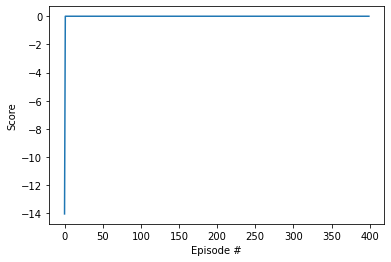

In [14]:
## Score data analysis

scores = np.zeros(len(f['rewards'].keys()))
i = 0
for k in f['rewards'].keys():
     scores[i] = np.sum(f['rewards'][k][:])

## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print(f'The max score is at episode {index_max} and is equal to {scores[index_max]}')
print(f'The min score is at episode {index_min} and is equal to {scores[index_min]}')
    
## Plot scores    
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

This episode collected a score of =  -20.41437


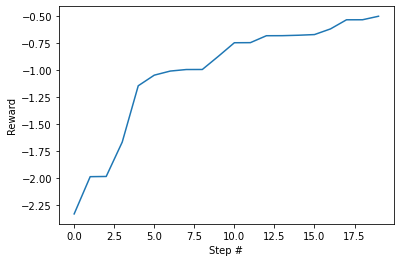

In [8]:
## Rewards of episode with max score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_max}'])), f['rewards'][f'rew_ep_{index_max}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_max}'][:]))

The last energy reached is =  0.000587872


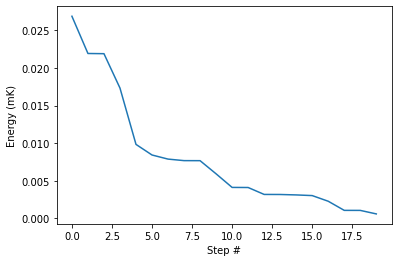

In [9]:
## Plot energies of episode with max score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_max}'])), f['energies'][f'en_ep_{index_max}'][:])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_max}'][-1])

The last princip dim reached is =  20


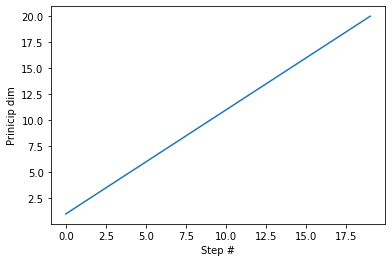

In [10]:
## Plot princip dim of episode with max score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_max}'])), f['princip_dims'][f'pri_dim_ep_{index_max}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_max}'][-1])

(array([2., 1., 0., 3., 2., 4., 2., 1., 3., 2.]),
 array([ 8348.404,  9231.875, 10115.347, 10998.817, 11882.289, 12765.76 ,
        13649.23 , 14532.702, 15416.173, 16299.645, 17183.115],
       dtype=float32),
 <BarContainer object of 10 artists>)

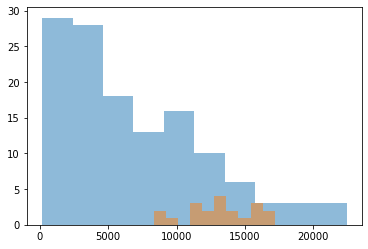

In [12]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

sigmas_rl = f['sigmas'][f'sigmas_ep_{index_max}'][:]
sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)

This episode collected a score of =  -11.352773


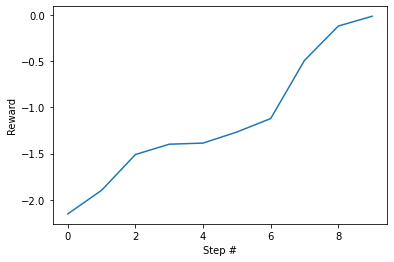

In [42]:
## Plot rewards of episode with min score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_min}'])), f['rewards'][f'rew_ep_{index_min}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_min}'][:]))

The last energy reached is =  -0.00642337


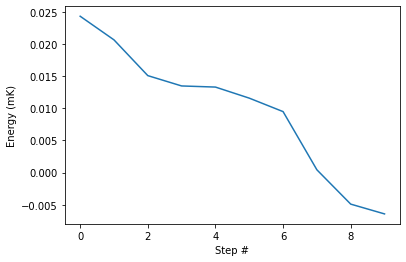

In [43]:
## Plot energies of episode with min score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_min}'])), f['energies'][f'en_ep_{index_min}'][:])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_min}'][-1])

The last princip dim reached is =  10


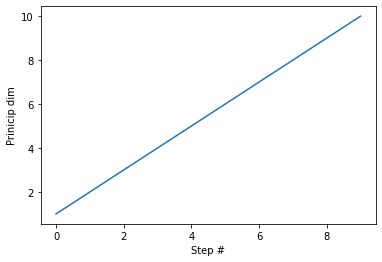

In [44]:
## Plot princip dim of episode with min score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_min}'])), f['princip_dims'][f'pri_dim_ep_{index_min}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_min}'][-1])

(array([2., 1., 1., 0., 1., 2., 1., 0., 1., 1.]),
 array([ 5491.8735,  6146.2627,  6800.652 ,  7455.041 ,  8109.43  ,
         8763.819 ,  9418.208 , 10072.598 , 10726.986 , 11381.376 ,
        12035.765 ], dtype=float32),
 <BarContainer object of 10 artists>)

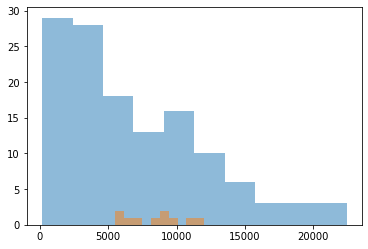

In [58]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

sigmas_rl = f['sigmas'][f'sigmas_ep{index_min}'][:]
sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)